 In this code, two samples (each of size 3) are drawn from a Bernoulli distribution with a true probability
$p_{true} = 0.3$. The code then computes and plots the (normalized) log-likelihood functions for the parameter $p$ over a grid. The maximum likelihood estimates (the sample proportions) for each sample will typically differ from the true $p$ due to the small sample sizes.

Sample 1: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1
 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
Sample 2: [0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1]


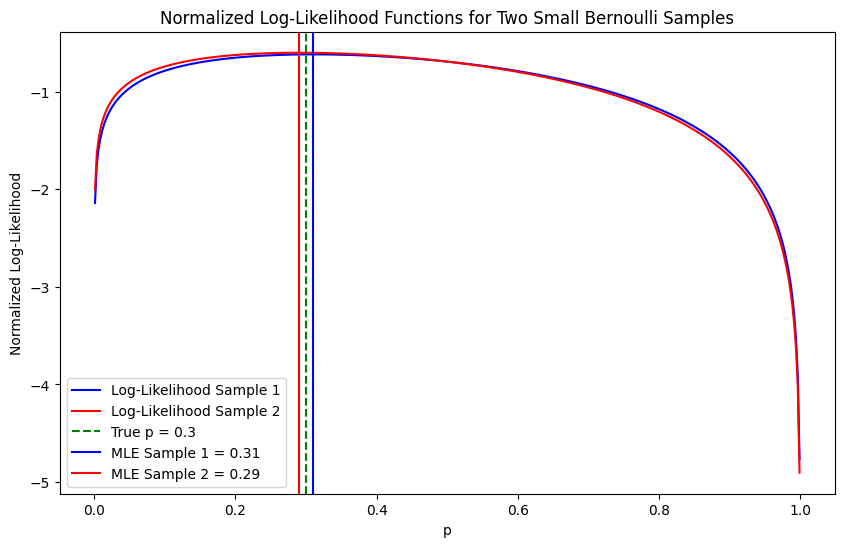

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
#np.random.seed(42)

# True parameter for the Bernoulli distribution
p_true = 0.3
n = 3  # Really small sample size


n = 10  # Larger sample

n = 100 # Quite large sample

# Generate two small samples from Bernoulli(p_true)
sample1 = np.random.binomial(1, p_true, n)
sample2 = np.random.binomial(1, p_true, n)

# Print the samples
print("Sample 1:", sample1)
print("Sample 2:", sample2)

# Define a grid of p values (avoid 0 and 1 to prevent log(0) issues)
p_grid = np.linspace(0.001, 0.999, 400)

# Function to compute the normalized log-likelihood for a Bernoulli sample
def log_likelihood(p, sample):
    # Normalized by the sample size: divide the log-likelihood by n
    return np.sum(sample * np.log(p) + (1 - sample) * np.log(1 - p)) / len(sample)

# Compute normalized log-likelihood values for each sample over the grid
ll1 = np.array([log_likelihood(p, sample1) for p in p_grid])
ll2 = np.array([log_likelihood(p, sample2) for p in p_grid])

# Maximum likelihood estimates (MLEs) which are the sample means
mle1 = sample1.mean()
mle2 = sample2.mean()

# Plotting the normalized log-likelihood functions
plt.figure(figsize=(10, 6))
plt.plot(p_grid, ll1, label="Log-Likelihood Sample 1", color='blue')
plt.plot(p_grid, ll2, label="Log-Likelihood Sample 2", color='red')

# Mark the true value of p with a vertical dashed line
plt.axvline(x=p_true, color='green', linestyle='--', label=f"True p = {p_true}")

# Mark the maximum likelihood estimates with solid vertical lines
plt.axvline(x=mle1, color='blue', linestyle='-', label=f"MLE Sample 1 = {mle1:.2f}")
plt.axvline(x=mle2, color='red', linestyle='-', label=f"MLE Sample 2 = {mle2:.2f}")

plt.xlabel("p")
plt.ylabel("Normalized Log-Likelihood")
plt.title("Normalized Log-Likelihood Functions for Two Small Bernoulli Samples")
plt.legend()
plt.show()
